# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.2: SARSA Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [3]:
# x = {(1, 2): 2, (3, 4): 1, (5, 6): 0, (7, 8): -2, (9, 10): 9}
# y = list(x.items())
# # print(y)
# z = sorted(y, key=lambda item: item[1], reverse = True)
# print(z)
# # print({k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse = True)})
# print(np.random.uniform(0, 1))

In [4]:
class SarsaAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        
  #      print("actions = ", actions)
        super(SarsaAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.qdict = {}
        
 #       self.stateActionValues = {}
        
    def stateToString(self, state):
        
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def get_q(self, s, a):
        
        key = (s, a)
        if key in self.qdict:
            value = self.qdict[key]
        else:
            value = 0
            self.qdict[key] = value
        return value
    
    def set_q(self, s, a, value):
        key = (s, a)
        self.qdict[key] = value
    
    def act(self, state):
        
        if np.random.random() <= self.epsilon:
            index = np.random.randint(self.num_actions)
            action = self.actions[index]
        else:
            values = []
            stateStr = self.stateToString(state)      

            values = [self.get_q(stateStr, action) for action in self.actions]
            maxval = np.max(values)
            
            max_indexes = np.where(values == maxval)[0]

            action = np.random.choice(max_indexes)
        
        return action
        
#         stateStr = self.stateToString(state)      
#   #      action = np.random.randint(0, self.num_actions) 
        
#         ## TODO 2
#         ## Implement epsilon greedy policy here
        
#         ranNum = np.random.uniform(0, 1)
        
#         if ranNum <= self.epsilon:
            
#             idx = np.random.randint(0, self.num_actions)
#             action = self.actions[idx]
            
#         else:
            
#             # creat state action pairs for current state
            
#             keys = [(stateStr, act) for act in self.actions] 
            
#             for key in keys:
                
#                 if key not in self.stateActionValues:
                    
#                     self.stateActionValues[key] = 0
            
#             x = list(self.stateActionValues.items())
            
#          #   y = [(k, v) for k, v in x if stateStr == self.stateToString(k[0])]
        
#             y = [(k, v) for k, v in x if stateStr == k[0]]
            
#             z = sorted(y, key=lambda item: item[1], reverse = True)
            
#             potential_actions = [w[0][1] for w in z if w[1] == z[0][1]]
            
#   #          print("potential_actions = ", potential_actions)
#             action = np.random.choice(potential_actions)
        
#         return action

    def learn(self, state1, action1, reward, state2, action2):
        
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the sarsa update here
        
        """
        SARSA Update
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * Q(s',a') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        
        """
        
        td_target = reward + self.gamma * self.get_q(state2Str, action2)
        new_qvalue = self.get_q(state1Str, action1) + self.alpha * (td_target - self.get_q(state1Str, action1))
        self.set_q(state1Str, action1, new_qvalue) 
        
  #      print("stateActionValues = ", self.stateActionValues)
        
#         td_target = reward + self.gamma * self.stateActionValues[(state2Str, action2)]
        
#         td_delta = td_target - self.stateActionValues[(state1Str, action1)]
        
#         self.stateActionValues[(state1Str, action1)] = self.stateActionValues[(state1Str, action1)] + self.alpha * td_delta


In [5]:
# interactive = True
# %matplotlib nbagg
# env = SimpleRoomsEnv()
# agent = SarsaAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_sarsa(10, interactive)

In [6]:
# interactive = False
# %matplotlib inline
# env = SimpleRoomsEnv()
# agent = SarsaAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_sarsa(50, interactive)

In [7]:
# interactive = True
# %matplotlib nbagg
# env = CliffWalkingEnv()
# # print(dir(env))
# agent = SarsaAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_sarsa(10, interactive)

Entering CliffWalkingEnv()


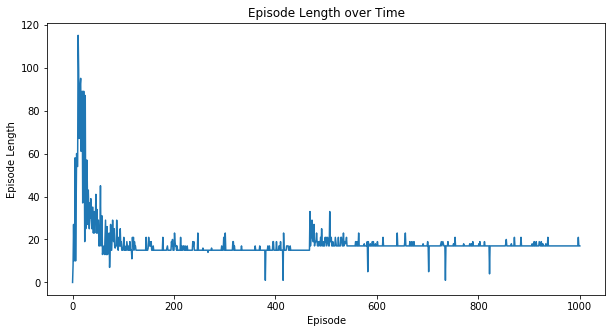

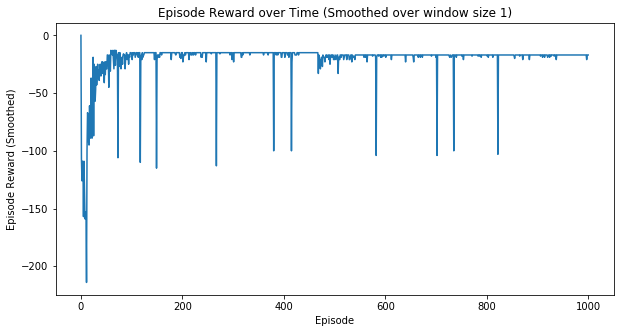

In [8]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(1000, interactive)

In [5]:
# interactive = False
# %matplotlib inline
# env = WindyGridworldEnv()
# agent = SarsaAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_sarsa(50, interactive)